<a href="https://colab.research.google.com/github/IrfanKpm/Machine-Learning-Notes1/blob/main/TensorFlow/_003_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
(x_train , y_train) , ( x_test , y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train[0].shape

(28, 28)

In [5]:
def plot_img(img):
   plt.figure(figsize=(3,3))
   plt.imshow(img)
   plt.plot()

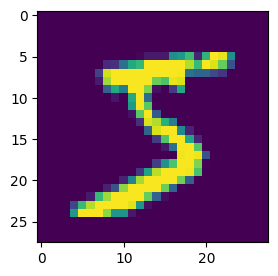

In [6]:
plot_img(x_train[0])

In [12]:
x_train = x_train / 255.0
x_test = x_test / 255.0

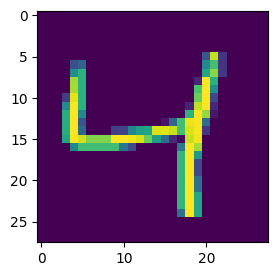

In [13]:
plot_img(x_train[2])

In [14]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [15]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [92]:
model = keras.Sequential([ # Input layer with a name
    keras.layers.Dense(128, activation='relu', name='Hidden_Layer_1'),
    keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8758 - loss: 0.4320
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9621 - loss: 0.1236
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9767 - loss: 0.0769
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9839 - loss: 0.0530
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9872 - loss: 0.0420
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9906 - loss: 0.0323
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9913 - loss: 0.0266
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9937 - loss: 0.0209
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9952 - loss: 0.0161
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9967 - loss: 0.0121


# Deep Learning Model Overview

## Model Structure

### Layers
- **Dense(128, activation='relu', input_shape=(784,))**:
  - This is a fully connected (dense) layer with 128 neurons.
  - **Input Shape**: The model expects input of shape `(784,)`, which corresponds to the flattened 28x28 pixel images from the MNIST dataset.
  - **Activation Function**: `ReLU` (Rectified Linear Unit) is used.

- **Dense(10, activation='softmax')**:
  - The output layer with 10 neurons, corresponding to the 10 possible digit classes (0-9).
  - **Activation Function**: `Softmax` is used to output a probability distribution over the 10 classes.

### Activation Functions
- **ReLU (Rectified Linear Unit)**:
  - **Why ReLU**: ReLU is chosen because it introduces non-linearity into the model while being computationally efficient. It helps the model to learn complex patterns in the data by allowing for backpropagation of errors.
  - **What is ReLU**: ReLU outputs the input directly if it is positive; otherwise, it outputs zero. This helps to avoid the vanishing gradient problem, making it popular in deep learning.

- **Softmax**:
  - **Why Softmax**: Softmax is chosen for the output layer in a multiclass classification problem like MNIST because it converts raw model outputs into a probability distribution that sums to 1.
  - **What is Softmax**: Softmax takes a vector of raw scores and transforms them into probabilities. The probability for each class is calculated as the exponential of the class's score divided by the sum of exponentials of all scores.

## Optimizer

### What is an Optimizer?
- An optimizer is an algorithm that adjusts the model's weights to minimize the loss function during training. It plays a crucial role in how well and how quickly the model learns.

### Adam Optimizer
- **What is Adam**: Adam (short for Adaptive Moment Estimation) is an optimizer that combines the benefits of two other extensions of stochastic gradient descent: AdaGrad and RMSProp.
- **Why Adam**: Adam is popular because it is computationally efficient, has low memory requirements, and works well with sparse gradients. It adapts the learning rate for each parameter, making it a good choice for many deep learning tasks.

## Loss Function

### What is Loss?
- The loss function measures the difference between the model's predictions and the true labels. The goal of training is to minimize this loss.

### Sparse Categorical Crossentropy
- **What is Sparse Categorical Crossentropy**: This is a loss function used for multiclass classification where the target labels are integers. It is a variant of categorical crossentropy but more efficient when dealing with integer labels.
- **Why Sparse Categorical Crossentropy**: It is chosen because the MNIST dataset labels are integer-encoded (0-9), making this loss function a perfect match.

## Metrics

### Accuracy
- **What is Accuracy**: Accuracy is a metric that calculates the proportion of correctly predicted instances among all predictions.
- **Why Accuracy**: It is a straightforward metric to understand the model's performance, especially in classification tasks like MNIST.



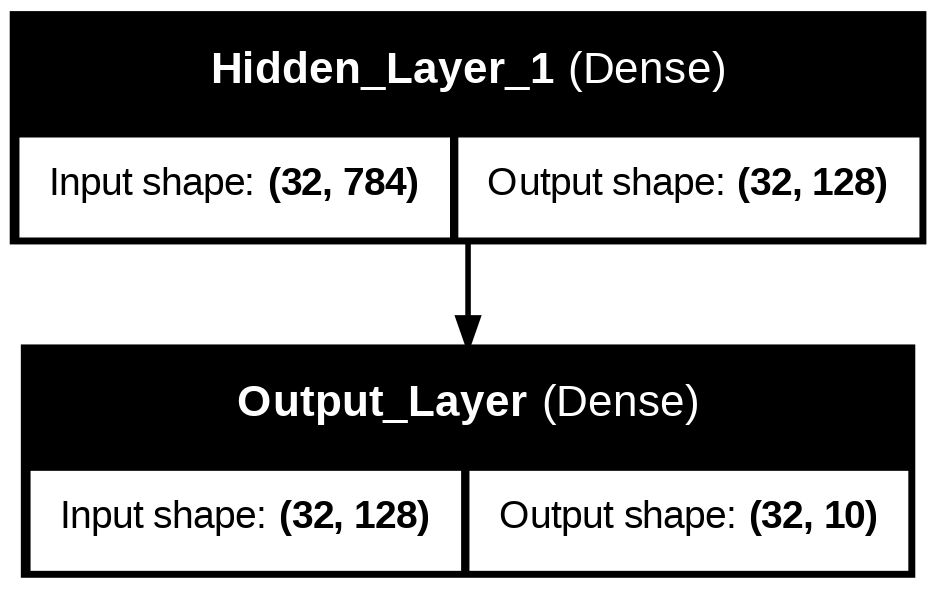

In [61]:
from tensorflow.keras.utils import plot_model

# Generate a visual representation of the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [62]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (32, 128)                   │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (32, 10)                    │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [94]:
loss, accuracy = model.evaluate(x_test_flattened, y_test)

# Print the accuracy and loss
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.1099
Test Loss: 0.09624321013689041
Test Accuracy: 0.9757999777793884


In [96]:
y_test_pred = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Predicted output for sample 8 : [1.5405177e-09 1.5631811e-13 2.1800571e-04 7.1984601e-08 3.0118716e-04
 9.8338157e-01 3.5640641e-04 4.1328350e-09 1.5675446e-02 6.7194327e-05]
Original label for sample 8 : 5
Predicted class for sample 8 : 5


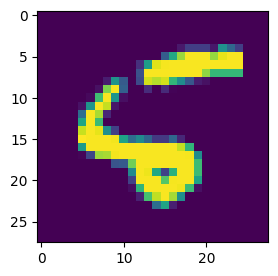

In [97]:
# Initialize an index for the test sample
n = 8

# Get the predicted output for the nth test sample
y = y_test_pred[n]
# Print the predicted output for the nth sample
print("Predicted output for sample", n, ":", y)
# Print the original label from the test set for the nth sample
print("Original label for sample", n, ":", y_test[n])
# Function to plot the image of the nth test sample
plot_img(x_test[n])
# Print the index of the maximum value in the predicted output
# This represents the predicted class for the nth sample
print("Predicted class for sample", n, ":", tf.math.argmax(y).numpy())


In [98]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=tf.math.argmax(y_test_pred, axis=1))
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
tf.Tensor(
[[ 968    0    2    1    1    3    2    0    3    0]
 [   3 1108    7    1    1    0    1    1   13    0]
 [   6    0 1014    1    2    0    2    1    5    1]
 [   0    0   11  965    1   17    0    1   11    4]
 [   1    0    3    0  965    0    4    1    2    6]
 [   2    0    0    4    2  871    3    0    9    1]
 [   5    3    2    0    6    3  937    0    2    0]
 [   2    2   13    1    1    0    0 1000    5    4]
 [   1    0    3    2    1    2    1    2  959    3]
 [   0    2    0    3   15    5    0    2   11  971]], shape=(10, 10), dtype=int32)


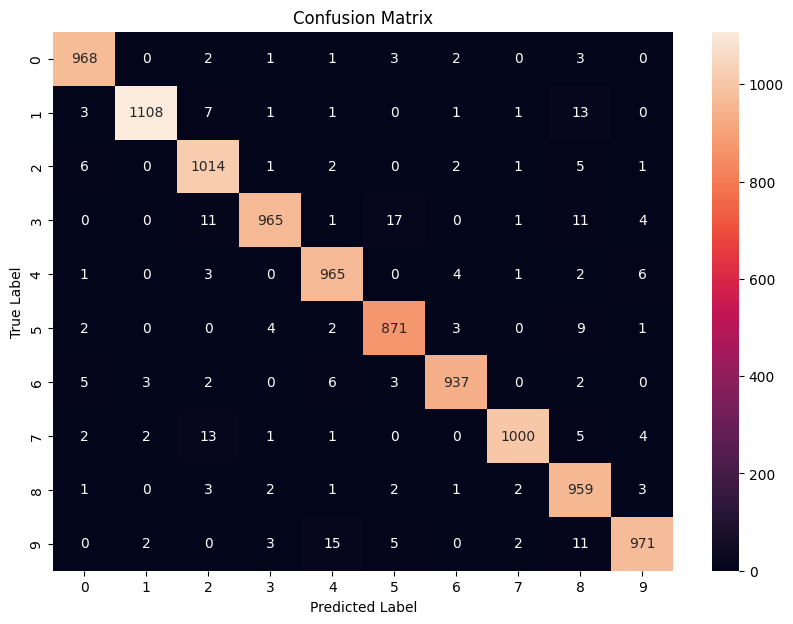

In [99]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [153]:
input_img1 = "/content/Screenshot 2024-08-17 084835.png"
input_img2 = "/content/six.jpg"

In [140]:
def preprocess_image(image_path):
   img = Image.open(image_path).convert('L')
   img = img.resize((28, 28))
   img_array = np.array(img)
   img_array = img_array / 255.0
   return 1-img_array


In [154]:
img1 = preprocess_image(input_img1)
img2 = preprocess_image(input_img2)

In [155]:
print(img1.shape)

(28, 28)


In [156]:
def predict(img):
   plot_img(img)
   img = img.reshape(1, 28*28)
   pred = model.predict(img)
   predicted_class = tf.math.argmax(pred, axis=1).numpy()[0]
   print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: 3


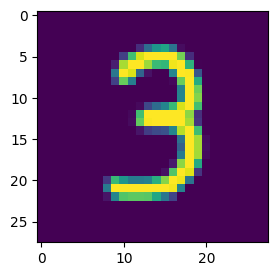

In [157]:
predict(img1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: 6


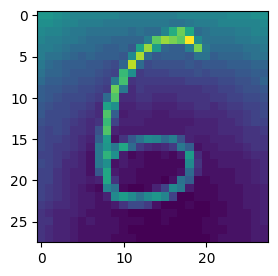

In [158]:
predict(img2)